In [1]:
import pdfplumber
import os
import timeit
import psutil
import string
import re
import csv

In [2]:
start = timeit.default_timer()
# file_path = 'Ley General del Equilibrio Ecologico y la Proteccion al Ambiente.pdf'
# file_path = 'Ley de Aguas Nacionales.pdf'
# file_path = 'Ley de Desarrollo Rural Sustentable.pdf'
# file_path = 'Ley General de Pesca y Acuacultura Sustentable.pdf'
# file_path = 'Ley General de Vida Silvestre.pdf'
# file_path = 'Ley General de Desarrollo Forestal Sustentable.pdf'
# file_path = 'Ley General Para la Prevención y Gestión Integral de Residuos.pdf'
# file_path = 'Ley Federal de Bioseguridad de Organismos Genéticamente Modificados.pdf'
# file_path = 'Ley General De Cambio Climático.pdf'

In [3]:
# Funcion open_file que realiza el proceso de conversion de pdf a text y separacion de palabras
def open_file(file_path):
    file_name = os.path.basename(file_path)
    pdf = pdfplumber.open(file_path)
    
    with open('text_pdfplumber.txt', 'w') as f:
        for page_num in pdf.pages:
            # print('Page: {0}'.format(page_num))
            #pageObj = pdf.pages[0]
            num_paginas = page_num
            try:
                txt = page_num.extract_text()
                # print(''.center(100, '-'))
            except:
                pass
            else:
                # f.write(''.center(100, '-'))
                f.write(txt)
        f.close()
    
    filename = "text_pdfplumber.txt"
    try:
        with open(filename) as f_obj:
            contents = f_obj.read()
    except FileNotFoundError:
        msg = "El archivo " + filename + " no existe"
        print(msg)
    else:
        words = contents.split()
        num_words = len(words)
        print("El archivo " + filename + " contiene: " + str(num_words) + " palabras")
    
    #Obtiene las palabras y las veces que se repiten en el archivo de texto
    copy_words=words
    frecuenciaPalab = [copy_words.count(w) for w in copy_words]
    new_lista=str(list(zip(copy_words, frecuenciaPalab)))
    
    
    end = timeit.default_timer()
    total_time= end - start
    # print (os.path.splitext(string">"file_path")[0])

#  Fuente: https://www.iteramos.com/pregunta/5172/como-obtener-el-nombre-del-archivo-sin-la-extension-de-una-ruta-en-python
    print('Nombre del archivo: ', file_path)
    print('Numero de paginas: ', num_paginas)
    print('Numero de paginas: ', num_words)
    print('Tiempo de ejecucion: ', end - start)
    print('Memoria RAM del Proceso: ', psutil.virtual_memory()[2])
    print('Memoria RAM TOTAL: ', psutil.virtual_memory().total)
    
    # Ciclo que lee cada palabra y la frecuencia y lo escribe en el csv
    for elemento in new_lista.split(')'):
        line_fi = file_name + " " + str(num_paginas) + " " + str(num_words) + " " + str(total_time) + " " + str(psutil.virtual_memory()[2]) + " " + str(psutil.virtual_memory().total) + str(elemento)
        with open('leyconpdfplumber.csv', 'a+') as f2:
            wr = csv.writer(f2)
            wr.writerow(line_fi.split(' '))


############## Termina la funcion open_file() 
# Aqui empieza a ejecutarse el programa

# crea archivo csv y agrega encabezado
with open('leyconpdfplumber.csv', 'w', newline='') as headercsv:
    writer = csv.DictWriter(headercsv, fieldnames = ["filename", "page_number", "num_words", "total time", "memoryporcent", "memorytotal", "word", "frecuencia"])
    writer.writeheader()


d = r"C:\Users\YESS\Downloads\Proyecto Mineria\Leyes"
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        open_file(full_path)

El archivo text_pdfplumber.txt contiene: 55365 palabras
Nombre del archivo:  C:\Users\YESS\Downloads\Proyecto Mineria\Leyes\LeydeAguasNacionales.pdf
Numero de paginas:  <Page:112>
Numero de paginas:  55365
Tiempo de ejecucion:  387.845379279
Memoria RAM del Proceso:  76.2
Memoria RAM TOTAL:  2948521984
El archivo text_pdfplumber.txt contiene: 25012 palabras
Nombre del archivo:  C:\Users\YESS\Downloads\Proyecto Mineria\Leyes\LeydeBioseguridaddeOrganismosGeneticamenteModificados.pdf
Numero de paginas:  <Page:49>
Numero de paginas:  25012
Tiempo de ejecucion:  560.055243676
Memoria RAM del Proceso:  63.5
Memoria RAM TOTAL:  2948521984
El archivo text_pdfplumber.txt contiene: 31387 palabras
Nombre del archivo:  C:\Users\YESS\Downloads\Proyecto Mineria\Leyes\LeydeDesarrolloRuralSustentable.pdf
Numero de paginas:  <Page:73>
Numero de paginas:  31387
Tiempo de ejecucion:  723.715652364
Memoria RAM del Proceso:  66.9
Memoria RAM TOTAL:  2948521984
El archivo text_pdfplumber.txt contiene: 26780

In [4]:
import os
import pandas as pd
import io

#import unicode
file= "leyconpdfplumber.csv"
#io.open(file,encoding='latin-1')
#file=r"/leyconpdfplumber.csv
df=pd.read_csv(file,encoding='latin-1')
df

,filename,page_number,num_words,total time,memoryporcent,memorytotal,word,frecuencia
0,LeydeAguasNacionales.pdf,<Page:112>,55365,387.845379,76.3,"2948521984[('LEY',",115,NaN
1,LeydeAguasNacionales.pdf,<Page:112>,55365,387.845379,76.3,"2948521984,","('DE',",345.0
2,LeydeAguasNacionales.pdf,<Page:112>,55365,387.845379,76.3,"2948521984,","('AGUAS',",115.0
3,LeydeAguasNacionales.pdf,<Page:112>,55365,387.845379,76.3,"2948521984,","('NACIONALES',",114.0
4,LeydeAguasNacionales.pdf,<Page:112>,55365,387.845379,76.3,"2948521984,","('CÁMARA',",112.0
...,...,...,...,...,...,...,...,...
309956,LeyGeneralparalaPrevencionyGestionIntegraldelo...,<Page:56>,24939,1916.075043,63.8,"2948521984,","('Rúbrica.',",14.0
309957,LeyGeneralparalaPrevencionyGestionIntegraldelo...,<Page:56>,24939,1916.075043,63.8,"2948521984,","('56',",57.0
309958,LeyGeneralparalaPrevencionyGestionIntegraldelo...,<Page:56>,24939,1916.075043,63.8,"2948521984,","('de',",2131.0
309959,LeyGeneralparalaPrevencionyGestionIntegraldelo...,<Page:56>,24939,1916.075043,63.8,"2948521984,","('56',",57.0


In [5]:
df.dropna()

,filename,page_number,num_words,total time,memoryporcent,memorytotal,word,frecuencia
1,LeydeAguasNacionales.pdf,<Page:112>,55365,387.845379,76.3,"2948521984,","('DE',",345.0
2,LeydeAguasNacionales.pdf,<Page:112>,55365,387.845379,76.3,"2948521984,","('AGUAS',",115.0
3,LeydeAguasNacionales.pdf,<Page:112>,55365,387.845379,76.3,"2948521984,","('NACIONALES',",114.0
4,LeydeAguasNacionales.pdf,<Page:112>,55365,387.845379,76.3,"2948521984,","('CÁMARA',",112.0
5,LeydeAguasNacionales.pdf,<Page:112>,55365,387.845379,76.3,"2948521984,","('DE',",345.0
...,...,...,...,...,...,...,...,...
309955,LeyGeneralparalaPrevencionyGestionIntegraldelo...,<Page:56>,24939,1916.075043,63.8,"2948521984,","('Dávila.-',",2.0
309956,LeyGeneralparalaPrevencionyGestionIntegraldelo...,<Page:56>,24939,1916.075043,63.8,"2948521984,","('Rúbrica.',",14.0
309957,LeyGeneralparalaPrevencionyGestionIntegraldelo...,<Page:56>,24939,1916.075043,63.8,"2948521984,","('56',",57.0
309958,LeyGeneralparalaPrevencionyGestionIntegraldelo...,<Page:56>,24939,1916.075043,63.8,"2948521984,","('de',",2131.0


array([[<AxesSubplot:title={'center':'num_words'}>,
        <AxesSubplot:title={'center':'total time'}>],
       [<AxesSubplot:title={'center':'memoryporcent'}>,
        <AxesSubplot:title={'center':'frecuencia'}>]], dtype=object)

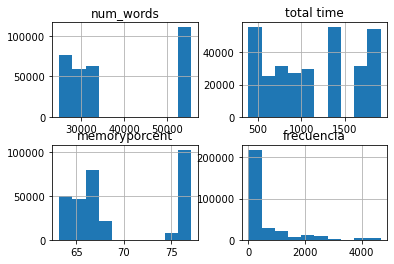

In [6]:
df.hist()

In [7]:
df.describe()

,num_words,total time,memoryporcent,frecuencia
count,309961.000000,309961.000000,309961.000000,309181.000000
mean,38236.978865,1103.032504,69.471397,541.475501
std,13050.203388,525.088697,5.295814,959.470161
min,24939.000000,387.845379,63.200000,1.000000
25%,29382.000000,560.055244,65.600000,9.000000
50%,31325.000000,1029.068226,66.800000,72.000000
75%,55365.000000,1618.801317,76.100000,627.000000
max,55609.000000,1916.075043,77.100000,4673.000000


In [8]:
df["word"].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0                    115
1                 ('DE',
2              ('AGUAS',
3         ('NACIONALES',
4             ('CÁMARA',
               ...      
309956      ('Rúbrica.',
309957            ('56',
309958            ('de',
309959            ('56',
309960               NaN
Name: word, Length: 309961, dtype: object>

array([[<AxesSubplot:title={'center':'frecuencia'}>]], dtype=object)

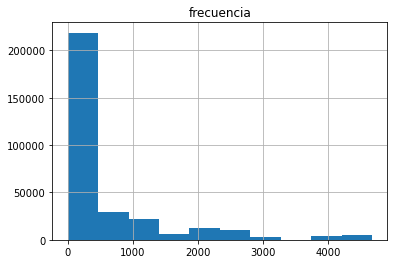

In [24]:
df.hist('frecuencia')